# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37 degrees C or 98.6 degrees F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest,ttest_1samp,norm
from statsmodels.stats.weightstats import ztest
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('data/human_body_temperature.csv')

1)  <b>Is the distribution of body temperatures normal?</b> 

According to the D'Agostino-Pearson test, yes. The histagram appears normal with a slight right-skew.



p >= alpha. The distribution is normal.
p = 0.26
alpha = 0.05


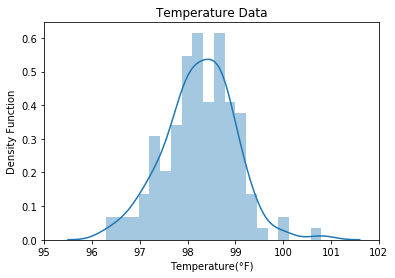

In [3]:
#Using the D'Agostino-Pearson Test to check for normalicy
Ksquared,pvalue = normaltest(np.array(df['temperature']))
#use p-test to check if normal
#Ho: The data is in a normal distributation (p >= alpha)
#Ha: The data is not in a normal distributation (p < alpha)
alpha =0.05
if(pvalue < alpha):
    print('p < alpha. The distribution is not normal.')
else:
    print('p >= alpha. The distribution is normal.')
print('p = {:.2f}'.format(pvalue))
print('alpha = {:.2f}'.format(alpha))    
                             

#create a histagram to visualize distribution.
sns.distplot(df['temperature'],bins=20,kde=True)
plt.xlabel('Temperature(\N{DEGREE SIGN}F)')
plt.ylabel('Density Function')
plt.title('Temperature Data')
plt.savefig('temperature.jpg',bbox_inches='tight')
plt.xlim([95,102])
plt.show()

2)<b>Is the sample size large? Are the observations independent? </b>

The sample size is greater than 30 therefore large enough for the Central Limit Theorem.
Samples are only 130 which is a small part(<10%)  of a larger total population.
Therefor observations do not have to be replaced before sampling and considered independent.

3)<b>Is the true population mean really 98.6 degrees F?</b>
<ul> 
According to all the tests below (as well as the orignal paper this data came from) the data does not support the mean temperature being 98.6 degrees F.
<br>
<br>
<li><b> First, try a bootstrap hypothesis test. </b>
<br>
Results are below.
<br>
<br>
<b>Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?</b>
<br>
A one-sample test would be the approprate test for determining if the average body temperature is 98.6 degrees F since we are only interested in the average temperature of a single population. If, for example, we were examining the difference in average temperature between two populations, say male and female, the two-sample test would be appropate. 
<br>
<br>
<li><b>In this situation, is it appropriate to use the  t  or  z  statistic?</b>
<br>
Since the sample size is large (n > 30), a z test would be approprate.
<br>
<br>
<li><b>  Now try using the other test. How is the result be different? Why? </b>
<br>
Other than z-score having a lower p-value, the results are similar. The p-value is so small that difference may be noise. At larger sample size (N>30), the z-score and t-score are expected to be pretty much the same.
</ul>


bootstrap z-score, pvalue = -5.43, 5.55e-08


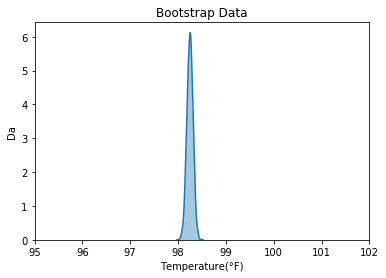


z-score, pvalue = -5.45, 4.90e-08

t-value, pvalue = -5.45, 2.41e-07


In [6]:
#Ho: Temp = 98.6 degrees F
#Ha: Temp != 98.6 degrees F

#bootstrap test
temp_sample_mean  = np.empty(10000)
for i in range(10000):
    temp_sample_mean[i] = np.mean(np.random.choice(df['temperature'],replace=True,size=130))
    
bootstrap_mean = temp_sample_mean.mean()
bootstrap_std = temp_sample_mean.std()

#z score bootstrap distribuation
alpha = 0.05
z_score = (bootstrap_mean-98.6)/bootstrap_std
pvalue = norm.sf(abs(z_score))*2
print('\nbootstrap z-score, pvalue = {:.2f}, {:.2e}'.format(z_score,pvalue))

#q_range = np.percentile(temp_sample_mean,[25, 97.5])
#print('bootstrap mean = {:.2f}'.format(bootstrap_mean))
#print('boostrap normal range [{:.2f} {:.2f}]'.format(q_range[0],q_range[1]))

      
      
      
sns.distplot(temp_sample_mean,bins=20,kde=True)
plt.xlim([95,102])
plt.ylabel('Da')
plt.xlabel('Temperature(\N{DEGREE SIGN}F)')
plt.title('Bootstrap Data')
plt.savefig('bootstrap.jpg',bbox_inches='tight')
plt.show()

#z test
N = len(df['temperature'])
original_mean = df['temperature'].mean()
original_std = df['temperature'].std()      
z_score = (original_mean-98.6)/(original_std/np.sqrt(N))
pvalue = norm.sf(abs(z_score))*2
print('\nz-score, pvalue = {:.2f}, {:.2e}'.format(z_score,pvalue))

#using a t-test
tvalue,pvalue = ttest_1samp(df['temperature'],98.6)
print('\nt-value, pvalue = {:.2f}, {:.2e}'.format(tvalue,pvalue))

4)<b> Draw a small sample of size 10 from the data and repeat both frequentist tests.</b>


<ul> <li><b>Which one is the correct one to use?</b>
<br>
<br>
Since the sample size is small (N < 30) the t-test is the appropate test.
<br>
<br>
<li><b>What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?</b>
<br>
<br>
The t test rejected the null hypothesis while the z test did not. Since the t-test agreed with the answer found using a larger sample, the results of the t-test is accepted rather than the z-test. This indicates that at lower sample sizes, the t-test is the appropate test.
 </ul> 
    

In [7]:
temp_small = np.random.choice(df['temperature'],replace=True,size=10)
small_mean = temp_small.mean()
small_std = temp_small.std()

#z test:
alpha = 0.06
N = len(temp_small)
z_score = (small_mean-98.6)/(small_std/np.sqrt(N))
pvalue = norm.sf(abs(z_score))*2
print('\nz-score, pvalue = {:.2f}, {:.2f}'.format(z_score,pvalue))

#t test
tvalue,pvalue = ttest_1samp(temp_small,98.6)
print('\nt-value, pvalue = {:.2f}, {:.2e}'.format(tvalue,pvalue))


z-score, pvalue = -1.40, 0.16

t-value, pvalue = -1.33, 2.16e-01


5) <b>At what temperature should we consider someone's temperature to be "abnormal"? </b>
    <ul>
    <li><b> As in the previous example, try calculating everything using the bootstrap approach, as well as the frequentist approach.</b>
    <li> <b> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. </b>
<br>
   Based on a 95% confidence interval, anything outside the temperature of 98.21 degrees F and 98.38 degrees F is considered abnormal with a margin of error of 0.13 degrees F . The average temperature is 98.25 +- 0.13 degrees F
    </ul>

In [8]:
#bootstrap test
temp_sample_mean  = np.empty(10000)
for i in range(10000):
    temp_sample_mean[i] = np.mean(np.random.choice(df['temperature'],replace=True,size=130))
    
bootstrap_mean = temp_sample_mean.mean()
bootstrap_std = temp_sample_mean.std()

q_range = np.percentile(temp_sample_mean,[2.5, 97.5])
margin_of_error = 1.96*bootstrap_std
print('boostrap 95% margin of error {:.2f}'.format(margin_of_error))
print('boostrap 95% confidence interval [{:.2f} {:.2f}]'.format(q_range[0],q_range[1]))

margin_of_error = 2.58*bootstrap_std
print('\nboostrap 99% margin of error {:.2f}'.format(margin_of_error))
q_range = np.percentile(temp_sample_mean,[0.5, 99.5])
print('boostrap 99% confidence interval [{:.2f} {:.2f}]'.format(q_range[0],q_range[1]))

boostrap 95% margin of error 0.12
boostrap 95% confidence interval [98.13 98.38]

boostrap 99% margin of error 0.16
boostrap 99% confidence interval [98.09 98.42]


6) <b>Is there a significant difference between males and females in normal temperature?</b>
<ul>
    <li><b> What testing approach did you use and why? </b>
<br>
Due to the large sample size (N > 30) I am using a z-test.
<br>
<br>
<li><b> Write a story with your conclusion in the context of the original problem. </b>
<br>
In 1868, Carl Reinhold August Wunderlich published his findings that the average human body temperature is 98.6 degrees F . Based on 1992 measures using more modern equipment by Philip A. Mackowiak et al., the average human body temperature instead was found to be 98.25 degrees F. 98.6 degrees F  wasn't even in the 99% confidence interval. The average temperature for women is slightly higher which is consistant with the findings of Wunderlich.
</ul>

In [15]:
temp_male = df[df['gender']=='M']
temp_female = df[df['gender']=='F']

N_male = temp_male['temperature'].count()
male_mean = temp_male['temperature'].mean()
male_std = temp_male['temperature'].std()
print('male mean,std,N = {:.2f}, {:.2f}, {}'.format(male_mean,male_std,N_male))

N_female = temp_male['temperature'].count()
female_mean = temp_female['temperature'].mean()
female_std = temp_female['temperature'].std()
print('female mean,std,N = {:.2f}, {:.2f}, {}'
.format(female_mean,female_std,N_female))

#difference of sample
diff_mean = male_mean - female_mean
diff_std = np.sqrt(male_std**2/N_male+female_std**2/N_female)
print('diff mean,std = {:.2f}, {:.2f},'
.format(diff_mean,diff_std))


#two sample z-test
z_score = (diff_mean-0)/diff_std
pvalue = norm.sf(abs(z_score))*2
print('\nz-score, p-value = {:.2f}, {:.2f}'.format(z_score,pvalue))
alpha = 0.05
if(pvalue < alpha):
    print('The null hypothesis that the men and women have the same average temperature is rejected.')
else:   
    print('The null hypothesis that the men and women have the same average temperature is not rejected.')   

male mean,std,N = 98.10, 0.70, 65
female mean,std,N = 98.39, 0.74, 65
diff mean,std = -0.29, 0.13,

z-score, p-value = -2.29, 0.02
The null hypothesis that the men and women have the same average temperature is rejected.
